In [1]:
import torch
import pandas as pd
from transformers import pipeline
torch.cuda.is_available()

c:\Users\User\anaconda3\envs\pytorch_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


True

In [2]:
# Initialize the sentiment analysis pipeline
sentiment_pipeline = pipeline("text-classification", 
                              model="cardiffnlp/twitter-roberta-base-sentiment-latest",
                              device=0) 

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cuda:0


In [3]:
# Read the data from the csv file
df = pd.read_csv(r"../Data/similarity_scores.csv")

<Axes: >

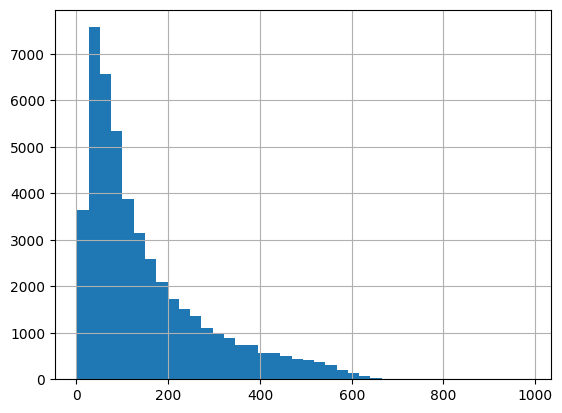

In [4]:
# Plot a graph to see the siz of text in Cleaned Text
df["Cleaned Text"].str.len().hist(bins = 40)

# All the text in the Cleaned Text column is less than the context limit of the sentiment analysis model (512 tokens)

In [5]:
# Calculate the sentiment of the combined text
df['Cleaned Text'] = df['Cleaned Text'].astype('str')
kwargs = {'padding':True,'truncation':True,'max_length':512}
results = sentiment_pipeline(df["Cleaned Text"].tolist(), **kwargs) 
df["label_1"] = [res["label"] for res in results]
df["score_1"] = [res["score"] for res in results]

In [6]:
# Save the dataframe to a csv file
df.to_csv(r"../Data/labelled_data_1.csv", index=False)